In [1]:
!pwd

/home/viluiz/PhD_work/ReactiveTransport/TestCase1.CationExchange/dataset_MonteCarlo_ranges_zeros_500.000


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import matplotlib as mpl


In [4]:
pd.__version__

'1.4.1'

In [5]:
df = pd.read_csv('dataset_CationExchange.csv')

In [6]:
df

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.292739,0.000000,0.000000,0.601470,0.000000,0.000000,0.000000,0.493386,0.972710,0.000000,1.046000e-02,NaN,9.209000e-02,1.074000e+00,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.414814,1.200480,0.551079,0.769386,0.000000,3.682000e-25,NaN,5.224000e-13,7.294000e-13,NaN
2,0.000000,0.000000,0.203814,0.601483,0.000000,0.047025,0.000000,0.105046,0.000000,0.625303,6.372000e-02,NaN,2.002000e-01,4.777000e-01,NaN
3,0.000000,0.000000,0.115108,0.000000,0.350343,0.000000,1.259696,0.000000,0.039641,0.000000,NaN,NaN,3.311000e-02,8.200000e-02,0.35030
4,0.032624,0.806132,0.426943,0.920760,1.108769,0.226193,1.086287,1.121129,0.039906,0.532387,1.002000e-01,0.8061,4.413000e-01,7.712000e-01,1.10900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.475260,0.827462,0.066225,0.555792,0.483940,0.187636,0.000000,0.000000,1.141175,0.827665,4.253000e-01,0.8275,6.489000e-02,6.570000e-01,0.48390
499996,0.393982,0.206301,1.153259,1.073725,0.542613,0.584806,1.322446,0.000000,0.000000,0.127970,4.534000e-01,0.2063,1.131000e+00,9.772000e-01,0.54260
499997,0.626173,0.000000,0.410486,0.239946,0.062042,0.162066,1.386580,0.000000,0.000000,0.963745,6.392000e-01,NaN,4.035000e-01,2.208000e-01,0.06204
499998,0.144791,0.609760,0.584559,0.873408,0.605776,0.506080,0.742091,0.000000,0.045558,1.090542,2.061000e-01,0.6098,5.682000e-01,7.671000e-01,0.60580


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0_Ca    500000 non-null  float64
 1   0_Cl    500000 non-null  float64
 2   0_Na    500000 non-null  float64
 3   0_K     500000 non-null  float64
 4   0_N5    500000 non-null  float64
 5   1_Ca    500000 non-null  float64
 6   1_Cl    500000 non-null  float64
 7   1_Na    500000 non-null  float64
 8   1_K     500000 non-null  float64
 9   1_N5    500000 non-null  float64
 10  out_Ca  431834 non-null  float64
 11  out_Cl  320804 non-null  float64
 12  out_Na  431945 non-null  float64
 13  out_K   431620 non-null  float64
 14  out_N5  320294 non-null  float64
dtypes: float64(15)
memory usage: 57.2 MB


In [8]:
df[df.isna().any(axis=1)]

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.292739,0.000000,0.000000,0.601470,0.000000,0.000000,0.000000,0.493386,0.972710,0.000000,1.046000e-02,NaN,9.209000e-02,1.074000e+00,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.414814,1.200480,0.551079,0.769386,0.000000,3.682000e-25,NaN,5.224000e-13,7.294000e-13,NaN
2,0.000000,0.000000,0.203814,0.601483,0.000000,0.047025,0.000000,0.105046,0.000000,0.625303,6.372000e-02,NaN,2.002000e-01,4.777000e-01,NaN
3,0.000000,0.000000,0.115108,0.000000,0.350343,0.000000,1.259696,0.000000,0.039641,0.000000,NaN,NaN,3.311000e-02,8.200000e-02,0.35030
5,0.541533,0.000000,0.000000,0.298799,0.278160,0.000000,0.555580,0.000000,0.083927,0.162019,1.046000e-01,NaN,NaN,1.173000e+00,0.27820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499990,0.040831,0.000000,1.072898,0.000000,0.891010,0.000000,0.915777,0.274683,0.000000,0.000000,1.836000e-05,NaN,1.155000e+00,NaN,0.89100
499991,0.575260,0.000000,0.000000,0.234453,0.000000,0.006678,0.162045,0.000000,0.000000,0.449728,5.850000e-01,NaN,NaN,2.149000e-01,NaN
499992,0.082408,0.000000,0.237345,0.000000,0.983406,0.212369,1.348589,1.107385,0.903901,0.753998,3.093000e-02,NaN,2.491000e-01,9.121000e-02,0.98340
499994,0.201940,0.777325,0.183591,1.144514,0.000000,0.416040,0.000000,0.000000,0.000000,1.020553,2.684000e-01,0.7773,1.791000e-01,1.016000e+00,NaN


In [9]:
df.describe()

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,4.318340e+05,320804.000000,4.319450e+05,4.316200e+05,320294.000000
mean,0.233193,0.467439,0.400576,0.432878,0.465748,0.233342,0.465626,0.399865,0.432227,0.466251,1.999739e-01,0.701244,5.078510e-01,5.410905e-01,0.699812
std,0.233507,0.467057,0.400239,0.433270,0.466697,0.233279,0.466372,0.399773,0.433166,0.466433,2.098601e-01,0.404033,4.271827e-01,4.336053e-01,0.404435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.902000e-27,0.000002,3.757000e-16,3.157000e-15,0.000011
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.366000e-02,0.351300,9.662000e-02,1.360000e-01,0.348600
50%,0.174156,0.350883,0.301241,0.324235,0.346839,0.175206,0.347378,0.300136,0.322289,0.349588,1.038000e-01,0.702300,4.565000e-01,4.814000e-01,0.700600
75%,0.437507,0.877184,0.751428,0.811357,0.873946,0.437289,0.872911,0.749313,0.811174,0.875463,3.522000e-01,1.051000,8.398000e-01,8.675000e-01,1.051000
max,0.699999,1.399996,1.199997,1.299996,1.399989,0.699995,1.399999,1.199999,1.299995,1.399996,7.521000e-01,1.400000,2.232000e+00,2.146000e+00,1.400000


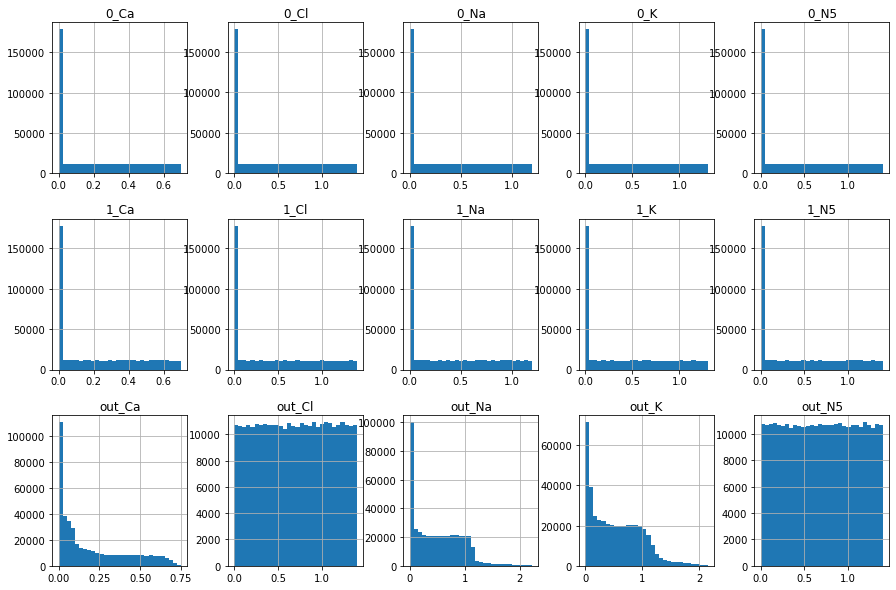

In [10]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

df.hist(alpha=1.,figsize = (15,10), layout=(3,5), bins=30);

In [11]:
df_corr_matrix = df.corr()
df_corr_matrix
df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

/tmp/ipykernel_16282/2324509408.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)


,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0_Ca,1.0000,0.0016,-0.0006,0.0008,0.0018,0.0018,-0.0020,0.0010,-0.0004,-0.0003,0.7648,0.0030,0.1163,0.2455,-0.0003
0_Cl,0.0016,1.0000,-0.0034,0.0022,0.0019,-0.0010,-0.0000,-0.0016,0.0005,0.0014,0.0006,1.0000,-0.0027,0.0034,0.0001
0_Na,-0.0006,-0.0034,1.0000,-0.0002,0.0009,0.0010,0.0013,0.0020,0.0011,-0.0012,0.0224,-0.0037,0.8522,0.0376,0.0002
0_K,0.0008,0.0022,-0.0002,1.0000,-0.0006,-0.0018,0.0002,0.0001,-0.0002,-0.0038,0.1000,0.0038,0.0672,0.8124,0.0004
0_N5,0.0018,0.0019,0.0009,-0.0006,1.0000,-0.0020,0.0007,-0.0007,0.0026,-0.0010,0.0013,0.0011,0.0008,0.0015,1.0000
1_Ca,0.0018,-0.0010,0.0010,-0.0018,-0.0020,1.0000,0.0004,-0.0001,-0.0003,0.0014,0.2809,-0.0028,-0.1592,-0.1954,-0.0020
1_Cl,-0.0020,-0.0000,0.0013,0.0002,0.0007,0.0004,1.0000,0.0013,-0.0020,-0.0015,-0.0017,0.0003,0.0017,-0.0028,0.0004
1_Na,0.0010,-0.0016,0.0020,0.0001,-0.0007,-0.0001,0.0013,1.0000,0.0035,0.0003,-0.0414,-0.0030,-0.0058,-0.0698,-0.0013
1_K,-0.0004,0.0005,0.0011,-0.0002,0.0026,-0.0003,-0.0020,0.0035,1.0000,0.0007,-0.0844,0.0007,-0.1436,0.0965,0.0022
1_N5,-0.0003,0.0014,-0.0012,-0.0038,-0.0010,0.0014,-0.0015,0.0003,0.0007,1.0000,0.0005,0.0003,-0.0030,-0.0034,0.0008


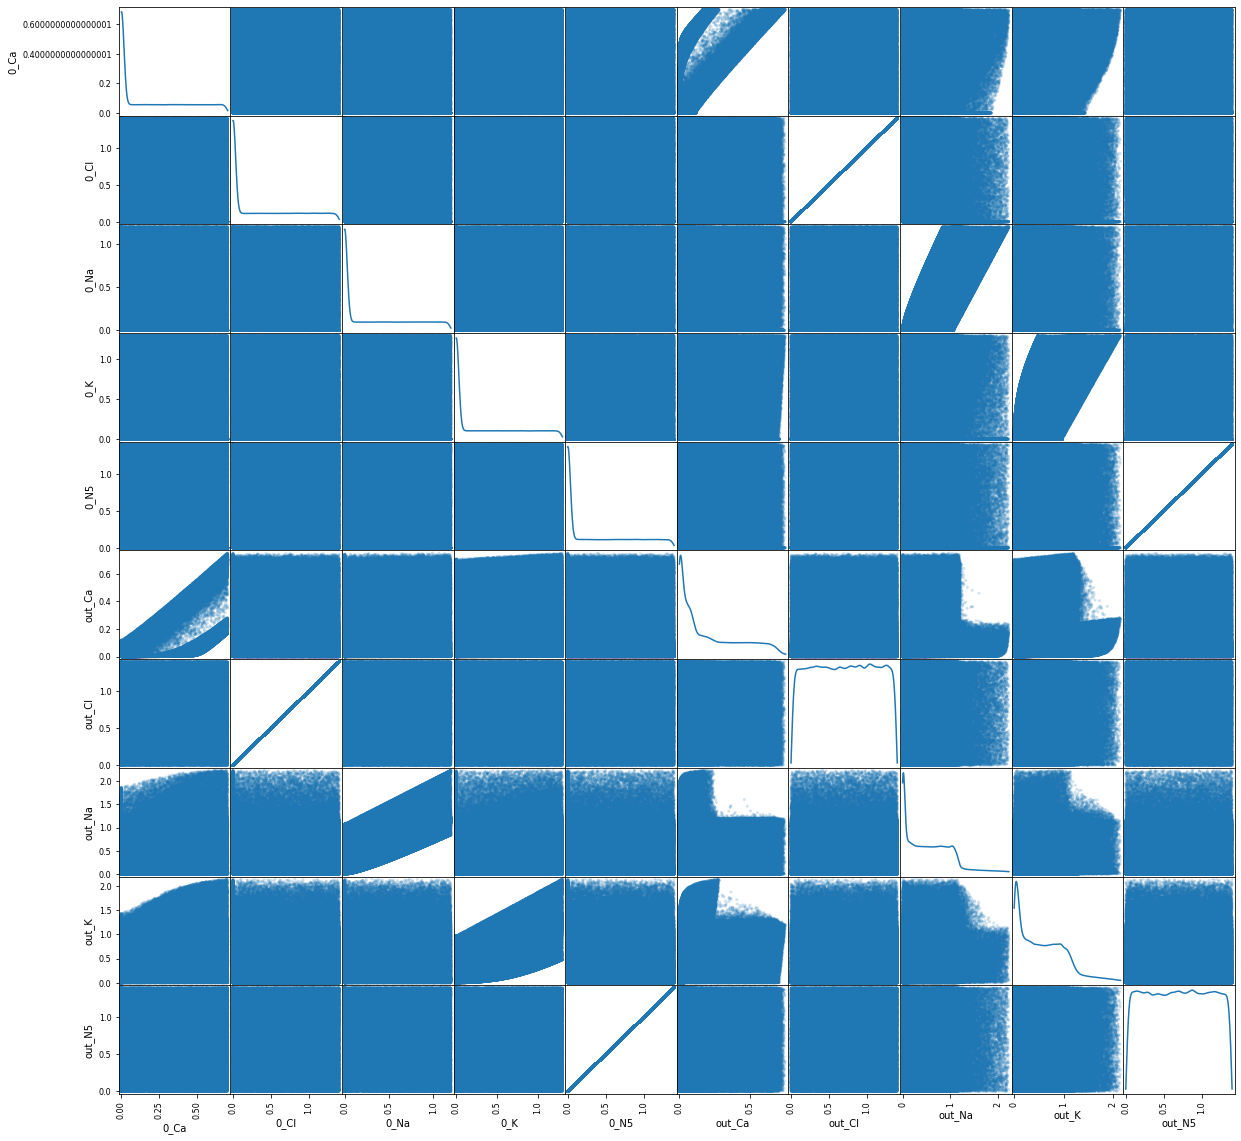

In [12]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[0,1,2,3,4,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));

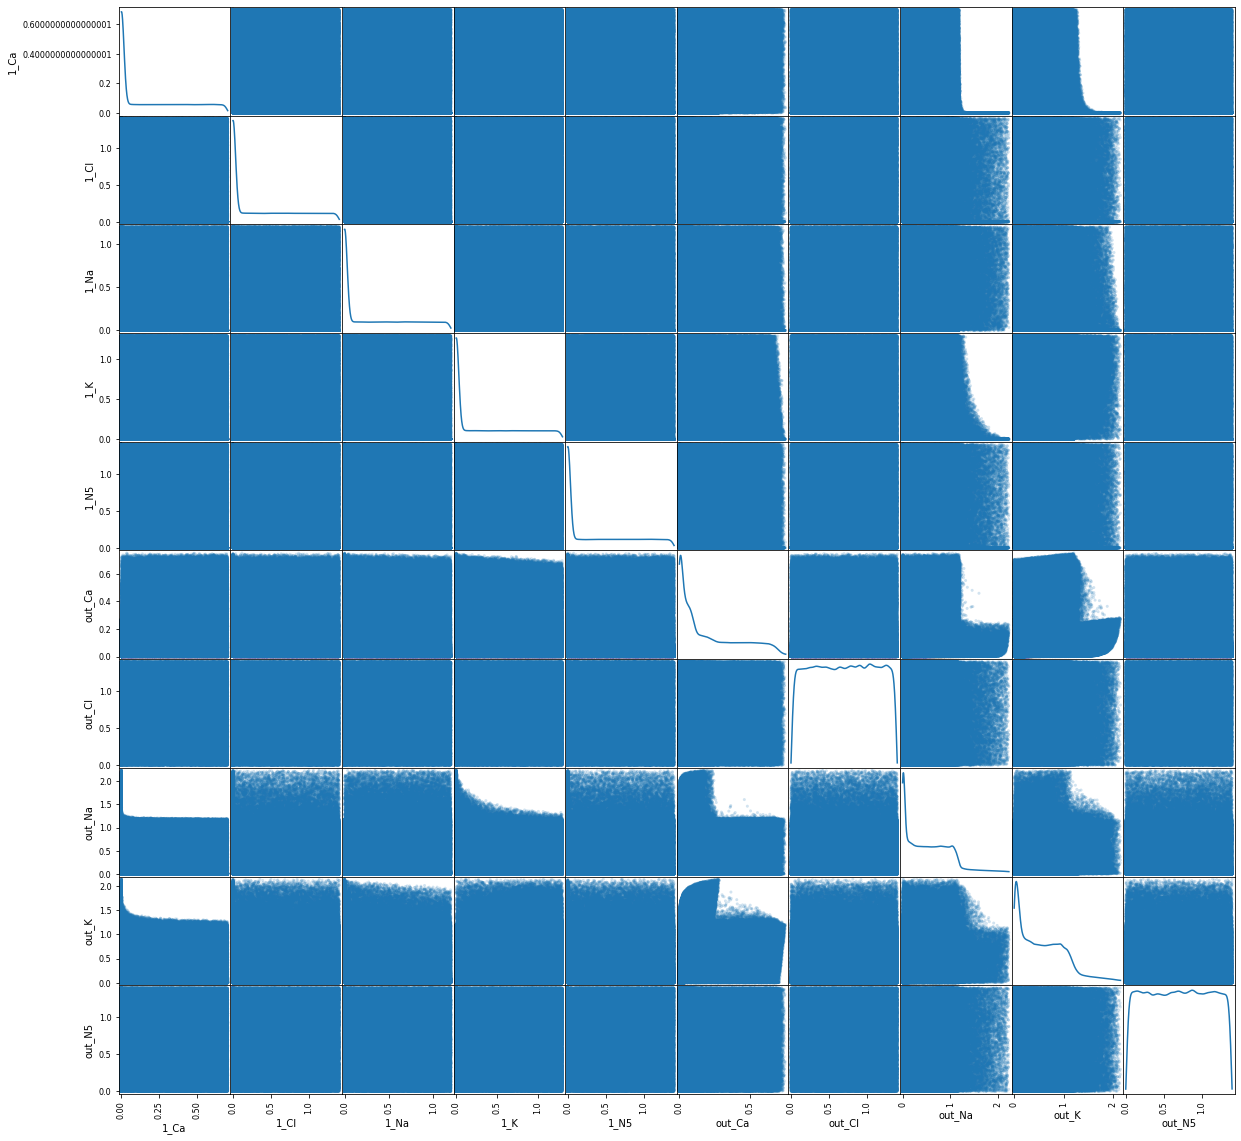

In [13]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[5,6,7,8,9,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));